In [1]:
import pandas as pd
import warnings

# 불필요한 경고 출력 방지
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
dataframe = pd.read_csv("C:/kovo/player_data_merge.csv", encoding = "CP949")
dataframe.head()

,player_name,player_number,player_position,player_img,player_birth,player_height,player_weight,player_school,player_history,구단,경기수,세트수,득점,공격 성공률,서브 성공률,세트 성공률,블로킹 성공률,공격 효율,리시브 효율,디그 성공률
0,허수봉,NO.7,OPPOSITE SPIKER,https://www.kovo.co.kr//upfiles/player/0001873...,1998년 04월 07일,195cm,75kg,호연초-경북사대부중-경북사대부고,2016-2017 V리그 대한항공드래프트1라운드 3순위 (2016.10.26)\n...,현대캐피탈,36,140,602,0.528431,0.056112,0.234694,0.162791,0.323529,0.288265,0.688312
1,김명관,NO.3,SETTER,https://www.kovo.co.kr//upfiles/player/0002233...,1997년 07월 08일,195cm,77kg,동인초-각리중-순천제일고-경기대,2019-2020 V리그 한국전력드래프트1라운드 1순위 (2019.09.22)\n...,현대캐피탈,33,128,88,0.354839,0.044601,0.529296,0.189516,0.193548,0.000000,0.719008
2,전광인,NO.12,OUTSIDE HITTER,https://www.kovo.co.kr//upfiles/player/0001462...,1991년 09월 18일,194cm,88kg,하동초 / 동명중·고 / 성균관대,2013-2014 V리그 한국전력드래프트1라운드 1순위 (2013.09.10)\n...,현대캐피탈,19,73,253,0.531328,0.062992,0.177419,0.176056,0.333333,0.471579,0.729730
3,김선호,NO.6,OUTSIDE HITTER,https://www.kovo.co.kr//upfiles/player/1000059...,1999년 01월 18일,187cm,82kg,부송초-남성중-남성고-한양대,2020-2021 V리그 현대캐피탈드래프트1라운드 1순위 (2020.10.16),현대캐피탈,34,105,162,0.466443,0.025926,0.302632,0.121212,0.308725,0.377358,0.652174
4,박경민,NO.13,LIBERO,https://www.kovo.co.kr//upfiles/player/1000060...,1999년 06월 05일,170cm,64kg,하양초-소사중-송산고-인하대,2020-2021 V리그 현대캐피탈드래프트1라운드 4순위 (2020.10.16),현대캐피탈,36,142,0,0.000000,0.000000,0.252809,0.000000,0.000000,0.518229,0.785124


### [21-22시즌] 모든 선수 기록 레이더 차트로 생성하는 함수 생성
- Player_RaderChart_All(csv)
- csv 파일 인자로 받음

In [8]:
# 21-22시즌 선수 기록 레이더 차트로 생성하는 함수 생성

def Player_RaderChart_All(csv):

    # 불러온 csv파일에서 [player_name	공격 성공률	공격 효율	세트 성공률	서브 성공률	블로킹 성공률	리시브 효율	디그 성공률] 컬럼만 가져옴
    df = csv.iloc[:,[0,-7,-3,-5,-6,-4,-2,-1]]

    # 기준점 생성 
    # 이 기준점보다 바깥에 있으면 잘하는 편이라는걸 표현하기 위해 기준점 생성
    # 순서대로 공격 성공률, 공격 효율, 세트 성공률, 서브 성공률, 블로킹 성공률, 리시브 효율, 디그 성공률 
    standard = [0.2,0.2,0.3,0.1,0.15,0.15,0.15,0.2]

    # 레이더 차트 그리기
    labels = df.columns[1:]
    num_labels = len(labels)
        
    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
        
    my_palette = plt.cm.get_cmap("Set2", len(df.index))
    
    fig = plt.figure(figsize=(20,25))
    fig.set_facecolor('white')
    
    for i, row in df.iterrows():
        data = df.iloc[i].drop('player_name').tolist()
        data += data[:1]
        
        ax = plt.subplot(6,4,i+1, polar=True)
        ax.set_theta_offset(pi / 2) ## 시작점
        ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
        
        plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
        ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
    
        ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
        plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1'], fontsize=10) ## y축 눈금 설정
        plt.ylim(-0.75,1)
        
        # 선수 데이터 그리기
        ax.plot(angles, data, color="blue", linewidth=2, linestyle='solid') ## 레이더 차트 출력
        #ax.fill(angles, data, color="skyblue", alpha=0.4) ## 도형 안쪽에 색을 채워준다.

        # 기준점 그리기
        ax.plot(angles, standard, color="red", linewidth=2, linestyle='solid') ## 레이더 차트 출력
        #ax.fill(angles, standard, color="pink", alpha=0.4) ## 도형 안쪽에 색을 채워준다.


        for g in ax.yaxis.get_gridlines(): ## grid line 
            g.get_path()._interpolation_steps = len(labels)
        
        spine = Spine(axes=ax,
                spine_type='circle',
                path=Path.unit_regular_polygon(len(labels)))
        
        ## Axes의 중심과 반지름을 맞춰준다.
        spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
                
        ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.

        plt.title("21-22시즌 기록"+" ["+df["player_name"][i]+"]",fontsize=15) 
        ax.legend([df["player_name"][i],"standard"],loc = "lower left")

        fig = plt.figure(figsize=(20,25))
        fig.set_facecolor('white')
    

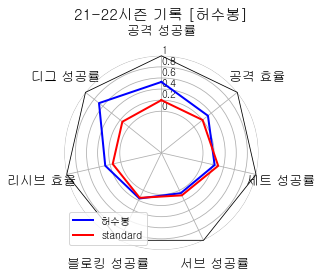

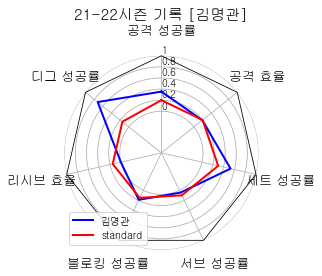

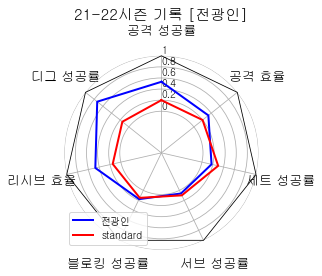

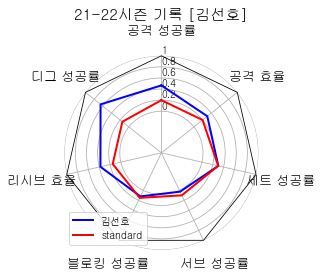

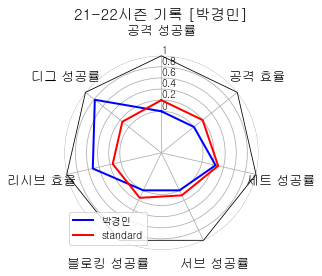

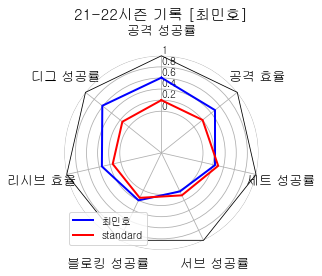

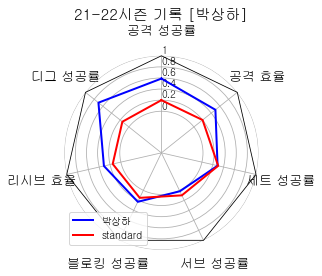

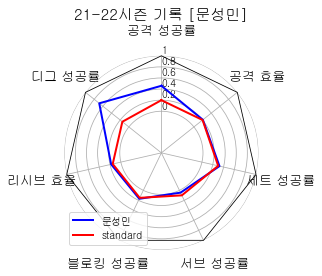

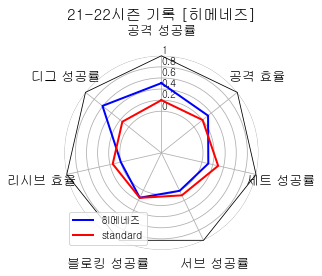

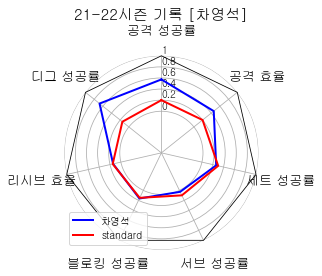

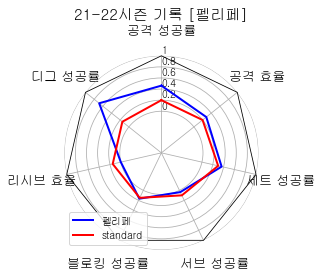

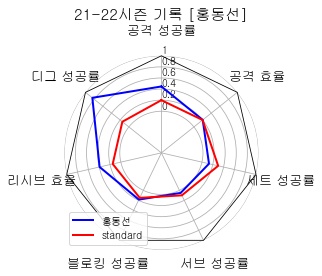

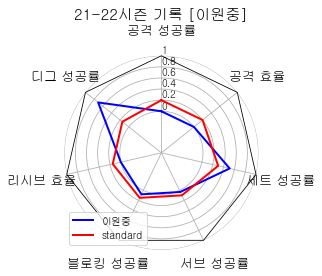

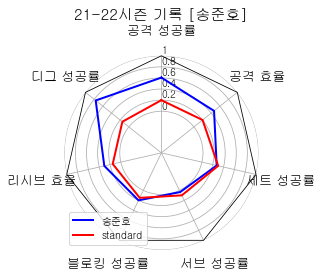

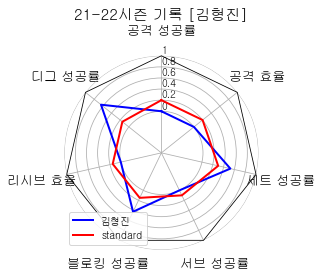

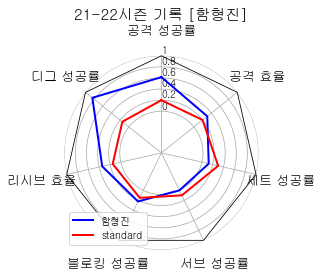

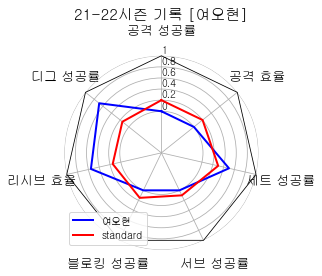

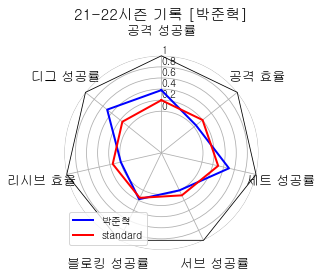

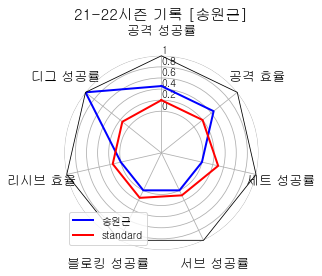

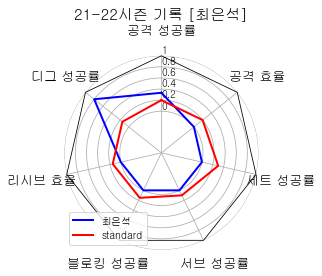

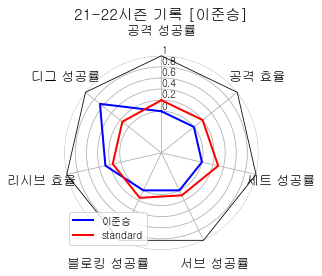

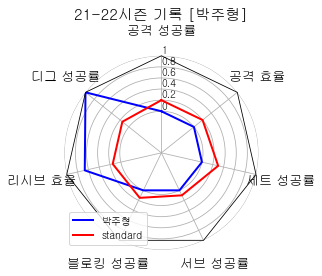

<Figure size 1440x1800 with 0 Axes>

In [9]:
# 함수로 레이더차트 그리기
Player_RaderChart_All(dataframe)

### [21-22시즌] 선택한 선수 기록 레이더 차트로 생성하는 함수 생성
- Player_RaderChart_One(csv,name)
- csv 파일, 선수 이름 인자로 받음

In [12]:
# 21-22시즌 한 선수 기록 레이더 차트로 생성하는 함수 생성

def Player_RaderChart_One(csv,name):

    # 불러온 csv파일에서 [player_name	공격 성공률	공격 효율	세트 성공률	서브 성공률	블로킹 성공률	리시브 효율	디그 성공률] 컬럼만 가져옴
    df = csv.iloc[:,[0,-7,-3,-5,-6,-4,-2,-1]]

    # 기준점 생성 
    # 이 기준점보다 바깥에 있으면 잘하는 편이라는걸 표현하기 위해 기준점 생성
    # 순서대로 공격 성공률, 공격 효율, 세트 성공률, 서브 성공률, 블로킹 성공률, 리시브 효율, 디그 성공률 
    standard = [0.2,0.2,0.3,0.1,0.15,0.15,0.15,0.2]

    # 레이더 차트 그리기
    labels = df.columns[1:]
    num_labels = len(labels)
        
    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
        
    my_palette = plt.cm.get_cmap("Set2", len(df.index))
    
    fig = plt.figure(figsize=(7,7))
    fig.set_facecolor('white')
    
    dt = df.loc[(df["player_name"]==name)]

    data = dt.drop(columns = ["player_name"]).iloc[0].tolist()
    data += data[:1]
        
    ax = plt.subplot(1,1,1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
        
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
    
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1'], fontsize=15) ## y축 눈금 설정
    plt.ylim(-0.75,1)
        
    # 선수 데이터 그리기
    ax.plot(angles, data, color="blue", linewidth=2, linestyle='solid') ## 레이더 차트 출력
    #ax.fill(angles, data, color="skyblue", alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    # 기준점 그리기
    ax.plot(angles, standard, color="red", linewidth=2, linestyle='solid') ## 레이더 차트 출력
    #ax.fill(angles, standard, color="pink", alpha=0.4) ## 도형 안쪽에 색을 채워준다.


    for g in ax.yaxis.get_gridlines(): ## grid line 
        g.get_path()._interpolation_steps = len(labels)
        
    spine = Spine(axes=ax,
            spine_type='circle',
            path=Path.unit_regular_polygon(len(labels)))
        
    ## Axes의 중심과 반지름을 맞춰준다.
    spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
                
    ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.

    plt.title("21-22시즌 기록"+" ["+ name +"]",fontsize=25) 
    ax.legend([name,"standard"],fontsize = 15,loc = (0,0.1))
    return plt.savefig('C:/image/'+name+'_레이더.png')


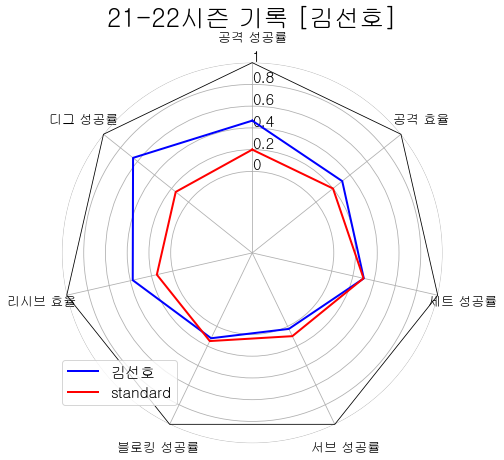

In [6]:
Player_RaderChart_One(dataframe,"김선호")

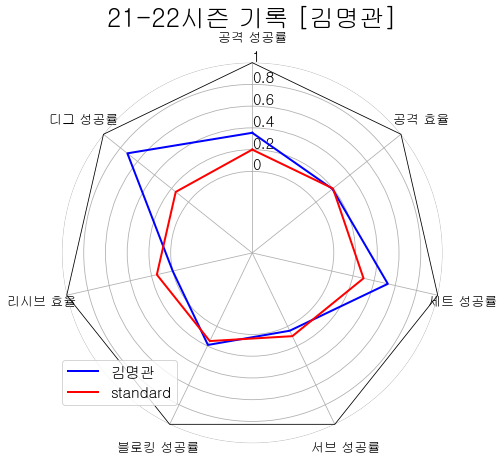

In [7]:
Player_RaderChart_One(dataframe,"김명관")

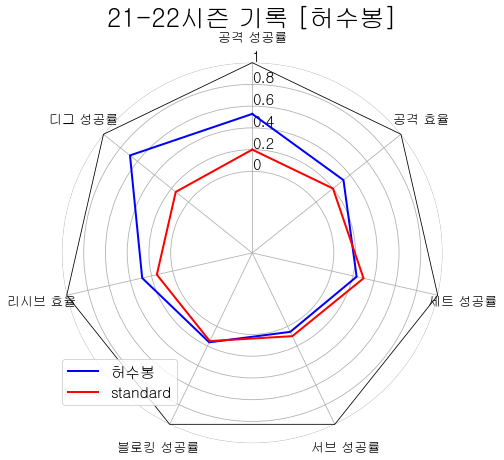

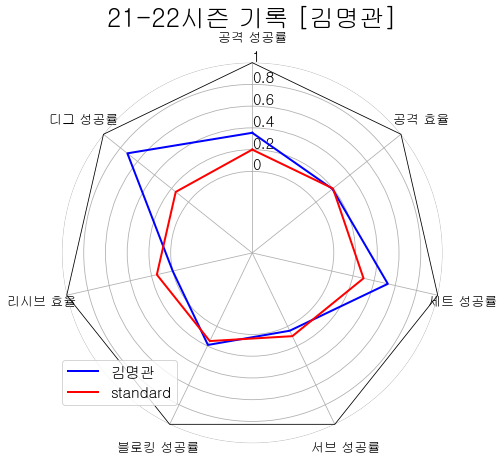

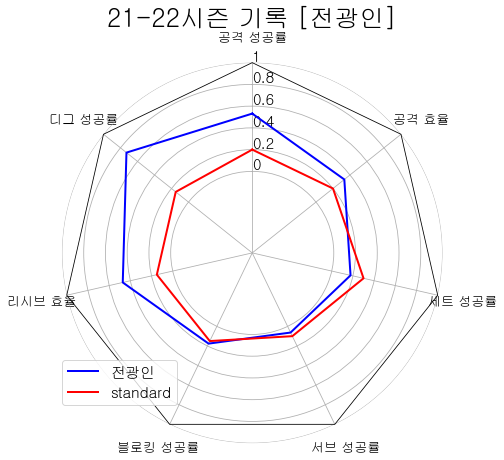

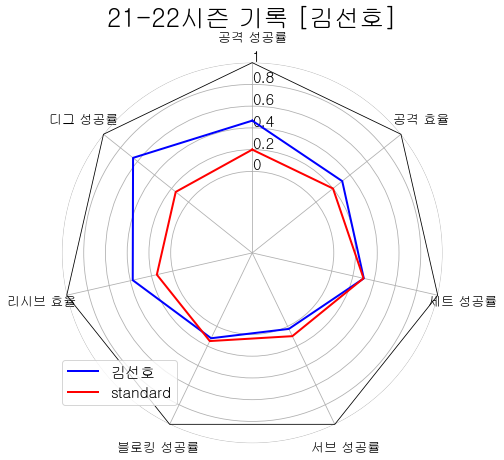

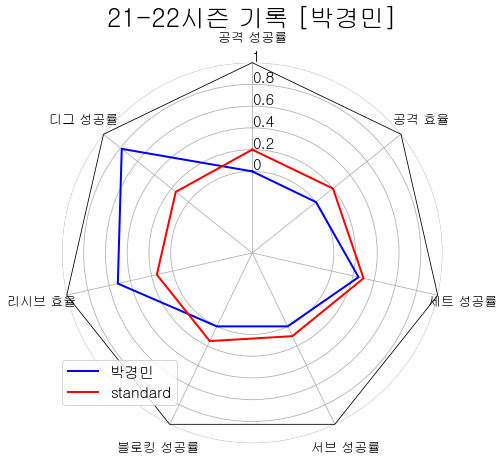

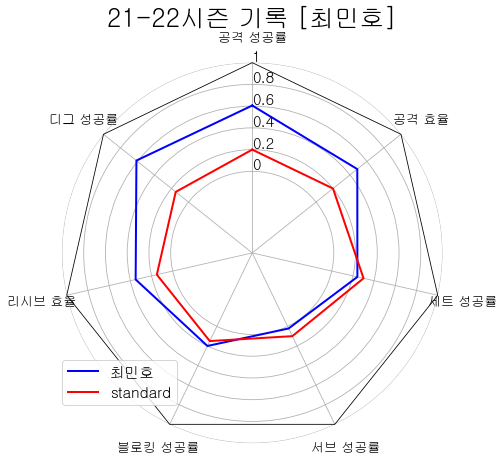

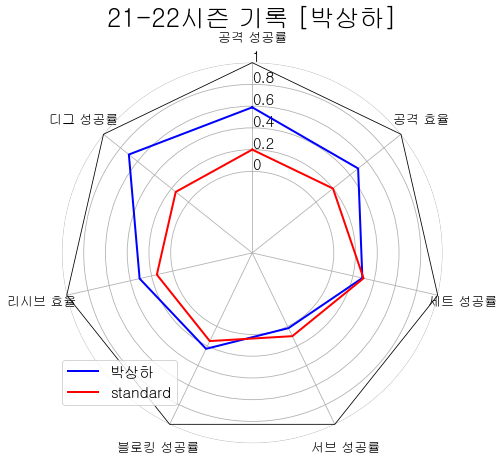

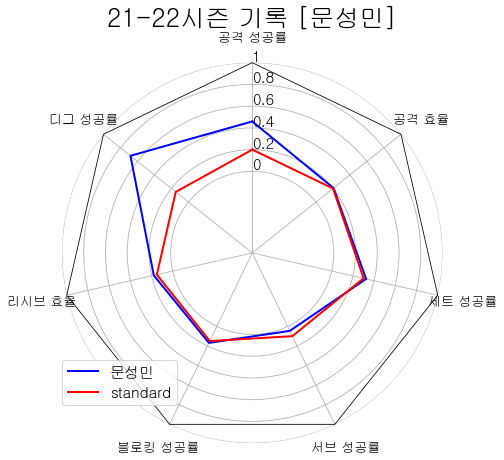

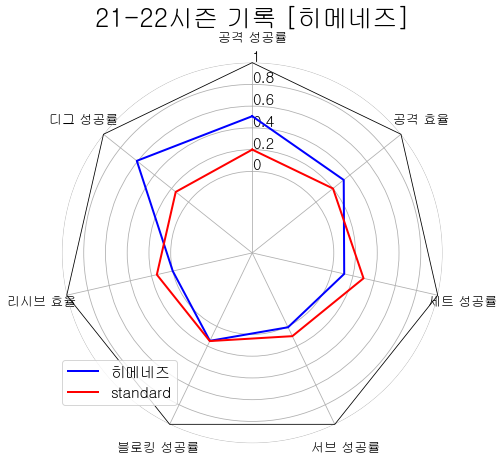

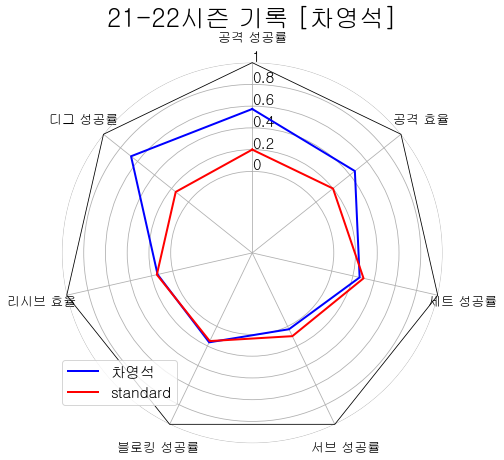

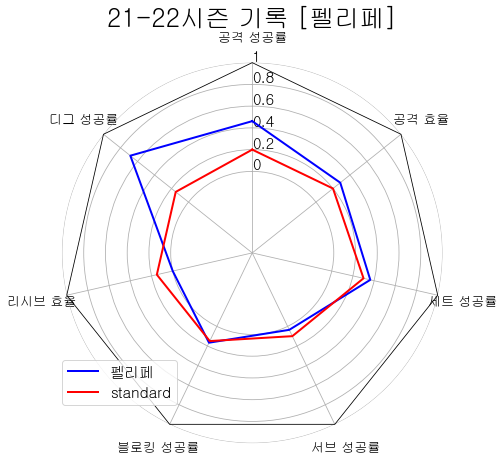

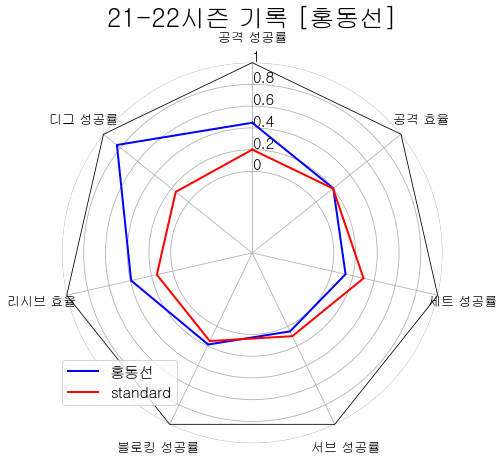

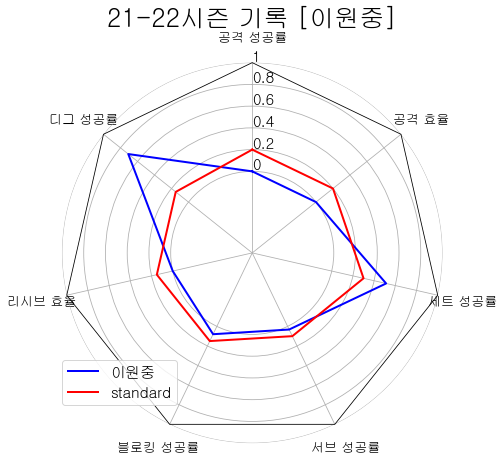

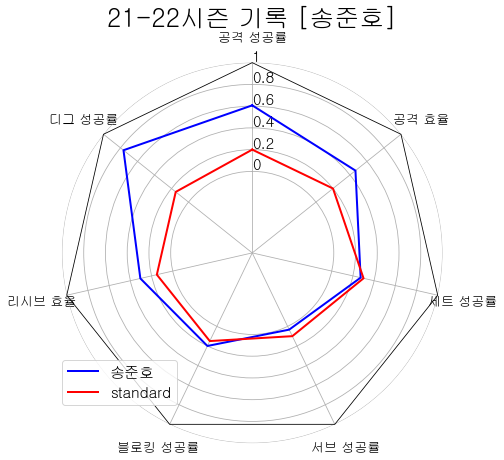

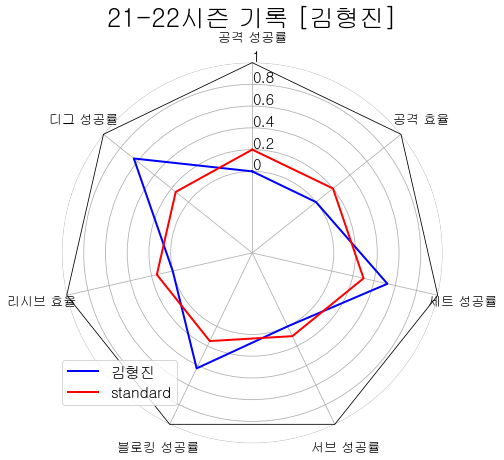

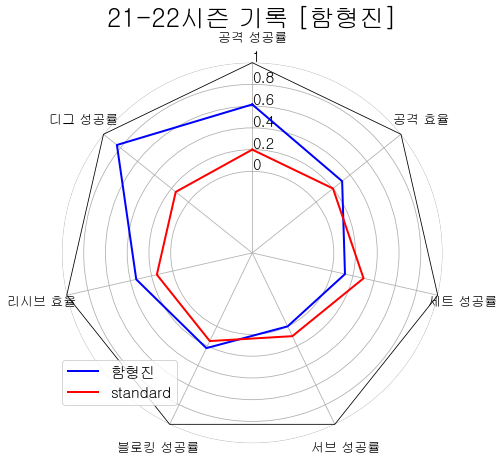

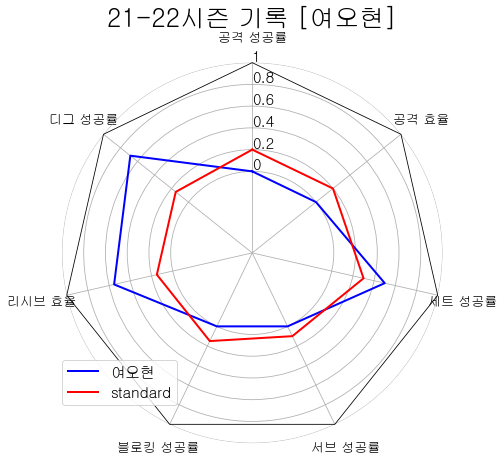

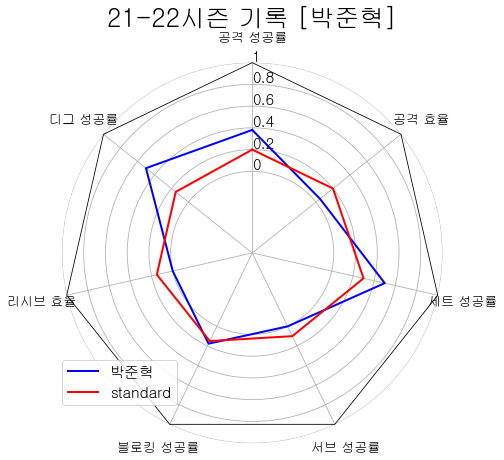

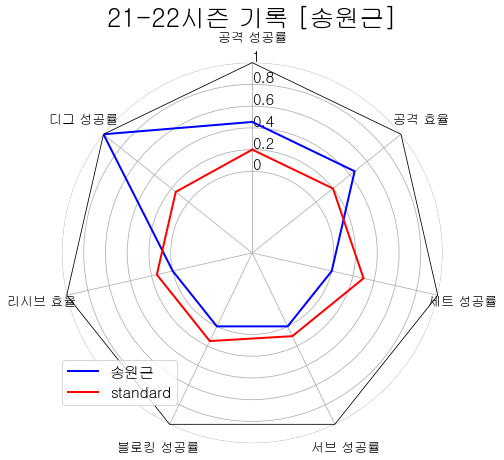

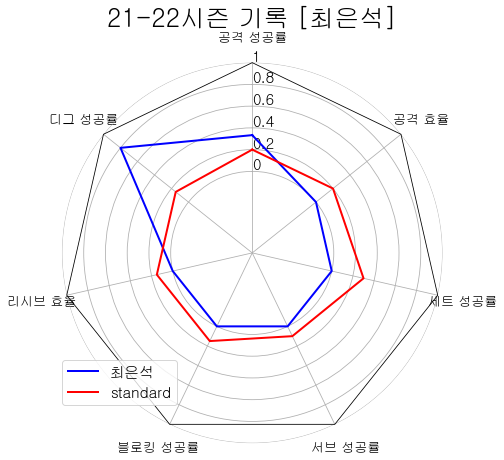

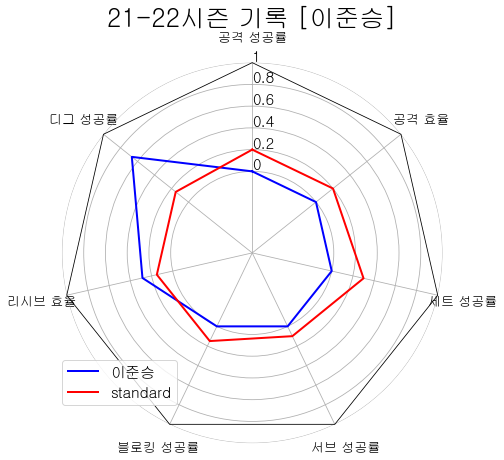

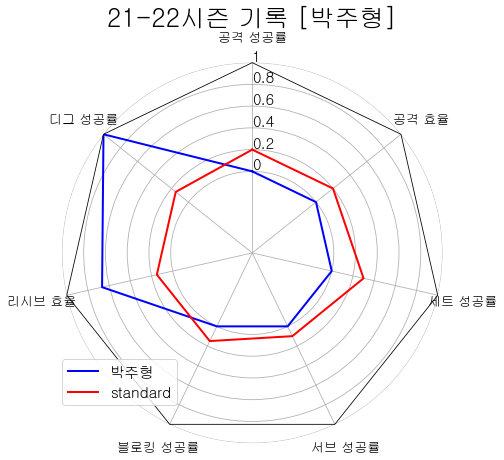

In [13]:
for player in dataframe["player_name"].tolist() :
    Player_RaderChart_One(dataframe,str(player))